1. Describe gráficamente el tiempo (en minutos) que estos 20 estudiantes tardaron en finalizar su tarea en
Udemy utilizando el gráfico adecuado:

In [3]:
import pandas as pd

tiempo_estudiantes = pd.Series([6.5,5.8,4.5,6.2,4.8,7.3,4.6,3.9,4.4,5.5,5.2,6.7,3.0,2.4,5.0,3.6,2.9,4.0,2.8,3.6])

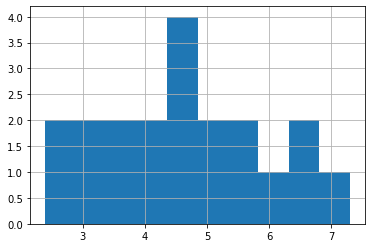

In [4]:
# visualizando la distribución del tiempo dedicado por los estudiantes
tiempo_estudiantes.hist()

2. Se ha solicitado a una muestra de 20 analistas financieros que nos den unos pronósticos de ganancias
del valor de la acción de nuestra empresa para el próximo año. Los resultados son los que siguen en la
siguiente tabla:

In [5]:
df = pd.DataFrame({
    'pronostico':['4.45 < 5.95','5.95 < 7.45','7.45 < 8.95','8.95 < 10.45','10.45 < 11.95','11.95 < 13.45'],
    'n_analistas':[2, 8, 4, 3, 2, 1]
})
df

,pronostico,n_analistas
0,4.45 < 5.95,2
1,5.95 < 7.45,8
2,7.45 < 8.95,4
3,8.95 < 10.45,3
4,10.45 < 11.95,2
5,11.95 < 13.45,1


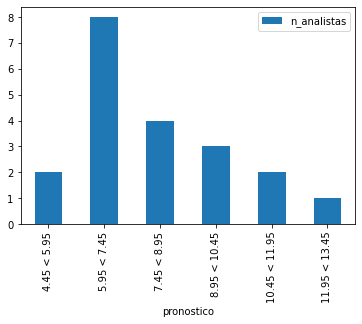

In [6]:
# a. histograma
df.plot.bar('pronostico','n_analistas')

In [7]:
# b. frecuencas relativas
df.assign(freq_rel = lambda df_: df_['n_analistas'] / df_['n_analistas'].sum())

,pronostico,n_analistas,freq_rel
0,4.45 < 5.95,2,0.10
1,5.95 < 7.45,8,0.40
2,7.45 < 8.95,4,0.20
3,8.95 < 10.45,3,0.15
4,10.45 < 11.95,2,0.10
5,11.95 < 13.45,1,0.05


In [8]:
# c. frecuencias acumuladas
(df
    .assign(freq_rel = lambda df_: df_['n_analistas'] / df_['n_analistas'].sum(),
            freq_acum = lambda df_: df_['n_analistas'].cumsum()
            )
    )

,pronostico,n_analistas,freq_rel,freq_acum
0,4.45 < 5.95,2,0.10,2
1,5.95 < 7.45,8,0.40,10
2,7.45 < 8.95,4,0.20,14
3,8.95 < 10.45,3,0.15,17
4,10.45 < 11.95,2,0.10,19
5,11.95 < 13.45,1,0.05,20


In [9]:
# d. frecuencias acumulativas relativas
(df
    .assign(freq_rel = lambda df_: df_['n_analistas'] / df_['n_analistas'].sum(),
            freq_acum = lambda df_: df_['n_analistas'].cumsum(),
            freq_acum_rel = lambda df_: df_['freq_rel'].cumsum()
            )
    )

,pronostico,n_analistas,freq_rel,freq_acum,freq_acum_rel
0,4.45 < 5.95,2,0.10,2,0.10
1,5.95 < 7.45,8,0.40,10,0.50
2,7.45 < 8.95,4,0.20,14,0.70
3,8.95 < 10.45,3,0.15,17,0.85
4,10.45 < 11.95,2,0.10,19,0.95
5,11.95 < 13.45,1,0.05,20,1.00


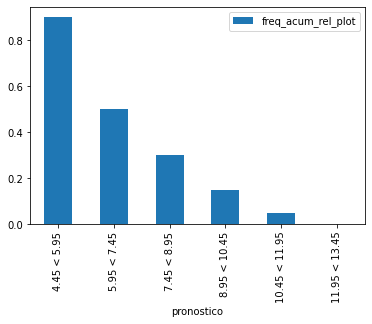

In [10]:
# visualisacion
(df
    .assign(freq_rel = lambda df_: df_['n_analistas'] / df_['n_analistas'].sum(),
            freq_acum = lambda df_: df_['n_analistas'].cumsum(),
            freq_acum_rel = lambda df_: df_['freq_rel'].cumsum(),
            freq_acum_rel_plot = lambda df_: 1 - df_['freq_rel'].cumsum()
            )
    ).plot.bar('pronostico','freq_acum_rel_plot')

3. ¿Cómo se suele enterar la gente sobre un producto nuevo? A una muestra aleatoria de 200 compradores
en una tienda en particular se les preguntó su edad y si se enteraron del producto por medio de un
amigo o por medio de un anuncio en un periódico local. Los resultados indicaron que 50 encuestados
eran menores de 21 años, 90 personas estaban en el grupo de edad entre 21 y 35 y 60 encuestados
tenían más de 35 años. De los menores de 21 años, 30 se enteraron del producto a través de un amigo y
el resto se enteró del producto a través de un anuncio en el periódico local. Un tercio de las personas
en la categoría de edad de 21 a 35 se enteró por primera vez sobre el producto a través del anuncio del
periódico local; el resto de este grupo de edad se enteró del producto por medio de un amigo. Un amigo
informó al 30% de las personas en la categoría de mayores de 35 años sobre el producto; el resto se
enteró por el anuncio del periódico local.

In [11]:
channel = pd.DataFrame([
    ['> 21', 'amigo', 30],
    ['> 21', 'periodico local', 20], 
    ['21 - 35', 'periodico local', 30],
    ['21 - 35', 'amigo', 60],
    ['35 <', 'amigo', 20], 
    ['35 <', 'periodico local', 40], 

], columns = ['age_range','channel','n_people'])
channel

,age_range,channel,n_people
0,> 21,amigo,30
1,> 21,periodico local,20
2,21 - 35,periodico local,30
3,21 - 35,amigo,60
4,35 <,amigo,20
5,35 <,periodico local,40


In [12]:
age_total = (channel
    .pivot_table(values='n_people', columns='channel', index='age_range')
    .assign(
        total_age = lambda df_: df_['amigo'] + df_['periodico local']
        )
    )
age_total

channel,amigo,periodico local,total_age
age_range,,,
21 - 35,60,30,90
35 <,20,40,60
> 21,30,20,50


In [13]:
channel_total = pd.DataFrame({
    'amigo': age_total['amigo'].sum(),
    'periodico local': age_total['periodico local'].sum(),
    'total_age': age_total['total_age'].sum(
    )
}, index = ['total_channel'])
age_total.append(channel_total)

,amigo,periodico local,total_age
21 - 35,60,30,90
35 <,20,40,60
> 21,30,20,50
total_channel,110,90,200


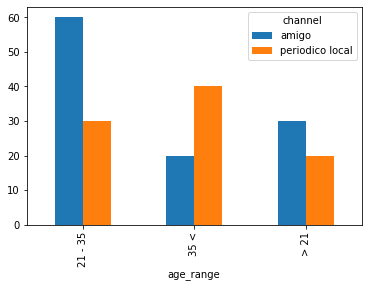

In [14]:
# describir los datos graficamente
channel.pivot_table(values='n_people', columns='channel', index='age_range').plot.bar()

4. Se encuesta a una muestra aleatoria de clientes para que seleccionara su refresco favorito de una lista de
cinco marcas. Los resultados mostraron que 30 preferían la Marca A, 50 preferían Marca B, 46 marca
preferida C, 100 marca preferida D, y 14 marcas preferidas E

In [15]:
# diagrama circular
brand = pd.DataFrame([
    ['A', 30],
    ['B', 50],
    ['C', 46],
    ['D', 100],
    ['E', 14]
], columns = ['marca','n_clientes'])
brand

,marca,n_clientes
0,A,30
1,B,50
2,C,46
3,D,100
4,E,14


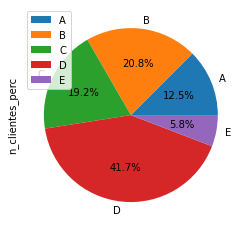

In [16]:
(brand
    .assign(
        n_clientes_perc = lambda df_: df_['n_clientes'] / df_['n_clientes'].sum()
        )
    .set_index('marca')
    .plot.pie(y='n_clientes_perc', autopct='%1.1f%%'))

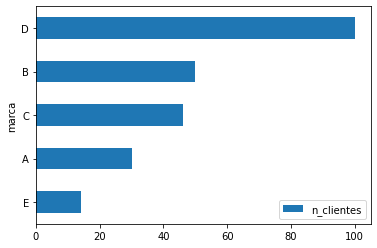

In [17]:
# b. Construye un diagrama de barras.
brand.sort_values(by='n_clientes').plot.barh('marca','n_clientes')

5. Accede a la web del Censo de Estados Unidos (https://www.census.gov) y busca un conjunto de datos
que consideres interesantes. Describe qué variables tiene y de que tipo se trata cada una de ellas,
1
así como qué tipo de gráfico utilizarías para realizar un resumen estadístico de la distribución de los
mismos.


In [18]:
usa_pop = pd.DataFrame([
    ['Under 5 years',19795159,	20249,	6.1],
    ['5 to 9 years',	20095947,	62409,	6.2],
    ['10 to 14 years',	21130768,	56442,	6.5],
    ['15 to 19 years',	21497166,	38471,	6.6],
    ['20 to 24 years',	21950055,	33648,	6.7],
    ['25 to 34 years',	44965735,	36952,	13.8],
    ['35 to 44 years',	41117905,	35116,	12.6],
    ['45 to 54 years',	42330955,	34932,	13],
    ['55 to 59 years',	21765184,	53487,	6.7],
    ['60 to 64 years',	20254592,	55486,	6.2],
    ['65 to 74 years',	29731876,	21417,	9.1],
    ['75 to 84 years',	14824363,	38830,	4.6],
    ['85 years and over',	6259473,	36320,	1.9]
], columns=['age_range','estimate','margin_of_error','percent'])

usa_pop

,age_range,estimate,margin_of_error,percent
0,Under 5 years,19795159,20249,6.1
1,5 to 9 years,20095947,62409,6.2
2,10 to 14 years,21130768,56442,6.5
3,15 to 19 years,21497166,38471,6.6
4,20 to 24 years,21950055,33648,6.7
5,25 to 34 years,44965735,36952,13.8
6,35 to 44 years,41117905,35116,12.6
7,45 to 54 years,42330955,34932,13.0
8,55 to 59 years,21765184,53487,6.7
9,60 to 64 years,20254592,55486,6.2


In [19]:
# age range: category, nominal
# estimate: numeric, integer
# margin of error: numeric, integer
# percent: numeric, float

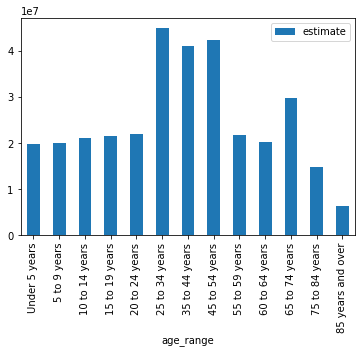

In [20]:
# visualisation
usa_pop.plot.bar('age_range','estimate')

6. Se ha entrevistado a una muestra aleatoria de 50 empleados que trabajaban para un gran empresa
internacional para establecer si existía un vínculo entre los trabajos de los empleados en casa durante
el teletrabajo originado por la pandemia del COVID19 y el lugar donde normalmente comían a la
hora del almuerzo, ya sea en el comedor o en sus escritorios de trabajo habitual. Los resultados de
esta investigación mostraron que el 75% del personal que trabaja desde casa normalmente comía en
el comedor de casa y el 54% de los empleados que seguían yendo a la oficina normalmente almorzaba
en sus escritorios donde trabajaban. Crea una tabla cruzada y un gráfico de barras para mostrar esta
información de forma clara.

In [21]:
pd.DataFrame([50], columns=['n_empleados'])

,n_empleados
0,50


7. Un banco ofrece cuatro tipos de cuentas corrientes. Recientemente hemos encuestado a una muestra
aleatoria de 300 clientes bancarios y se le han realizado varias preguntas. Se encontró que el 60% de los
encuestados preferia la cuenta fácil; el 12%, la cuenta inteligente; el 18%, la super cuenta corriente; y
el resto, la cuenta business. De los que seleccionaron la cuenta fácil, 100 eran mujeres; un tercio de
los encuestados que seleccionaron la cuenta inteligente eran hombres; la mitad de los encuestados que
seleccionaron la super cuenta corriente eran hombres; y el 80% de los encuestados que seleccionaron la
cuenta business eran hombres.


In [31]:
# a. Describe los datos con una tabla cruzada.
pd.DataFrame([
    ['cuenta facil',.60], 
    ['cuenta inteligente', .12],
    ['cuenta corriente', .18],
    ['cuenta business', .10]
], columns=['tipo de cuenta', 'porcentage'])

,tipo de cuenta,porcentage
0,cuenta facil,0.60
1,cuenta inteligente,0.12
2,cuenta corriente,0.18
3,cuenta business,0.10


In [23]:
# b. Describe los datos gráficamente.